# Gram Matrix
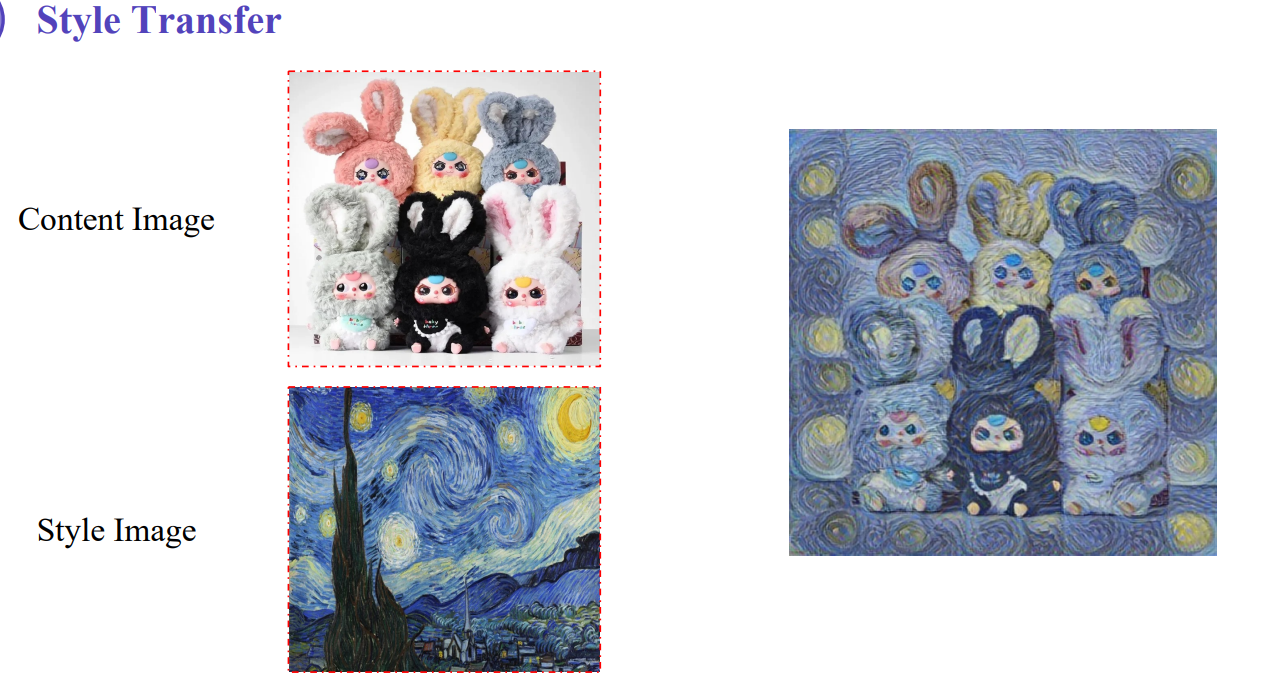
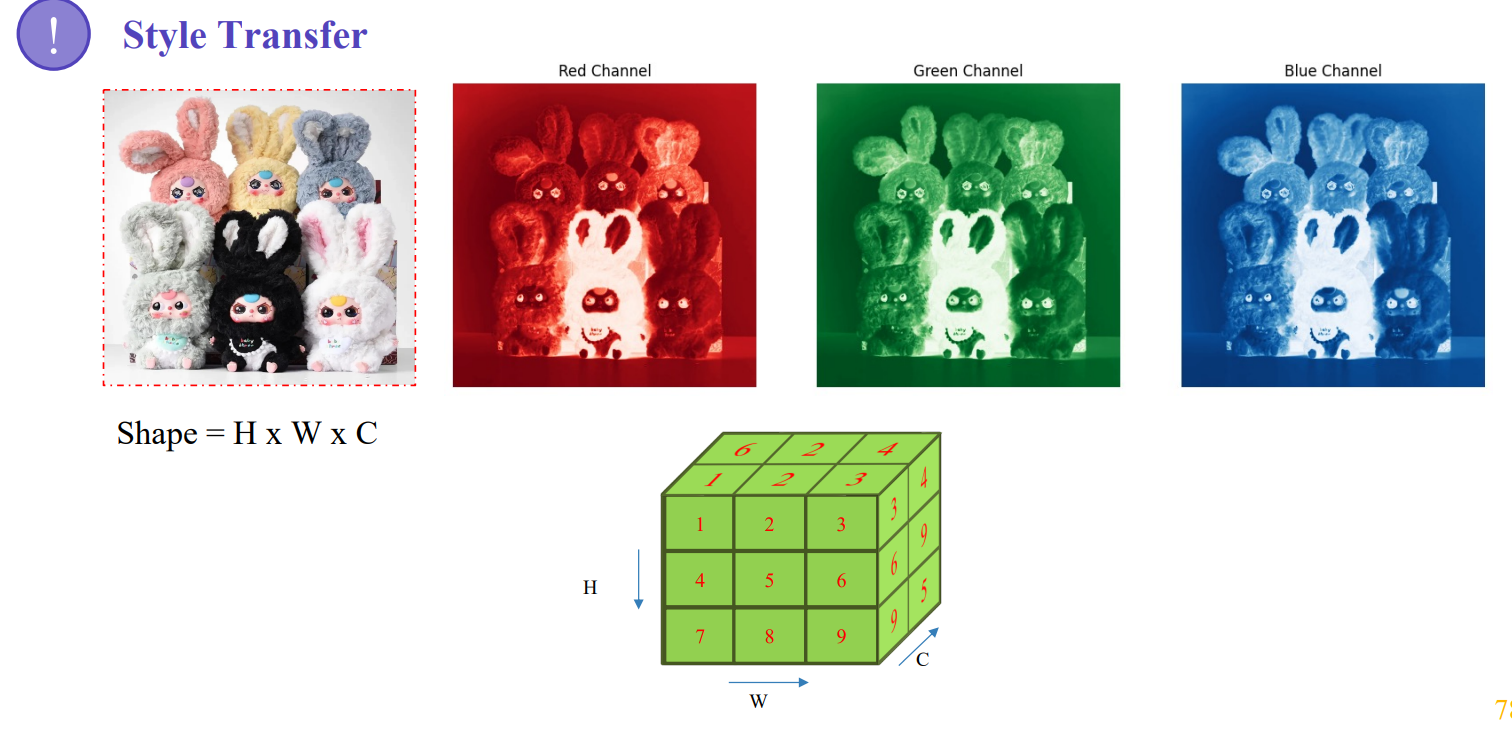

In [1]:
%pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2

In [ ]:
# Đọc ảnh
image = cv2.imread('.\img\nan.jpg')
